# Debug code

In [1]:
import yaml
import os
from collections import defaultdict
os.chdir('/home/mrsergazinov/TabLLM/')
from train_eval_adult import load_data, preprocess_data, train_and_evaluate_model

In [8]:
params = {
        'dataset_name': 'higgs',
        'model_name': 'MLP',
        'num_encoder': None,
        'num_encoder_trainable': False,
        'scaler': 'SquareScalingFeatures',
        'n_run': 1,
        'config_file': 'configs/higgs.yaml',
        'random_state': 42,
        'test_size': 0.2,
}

X, y, task_type = load_data(params)
y_train, y_test, X_train_num, X_train_cat, X_test_num, X_test_cat = preprocess_data(X, y, task_type, params)
metric = train_and_evaluate_model(
        X_train_num=X_train_num,
        X_test_num=X_test_num,
        X_train_cat=X_train_cat,
        X_test_cat=X_test_cat,
        y_train=y_train,
        y_test=y_test,
        task_type=task_type,
        params=params,
        verbose_training=False,
        verbose_evaluation=False,
)
print(metric)

70.73431922488527


# Plot results

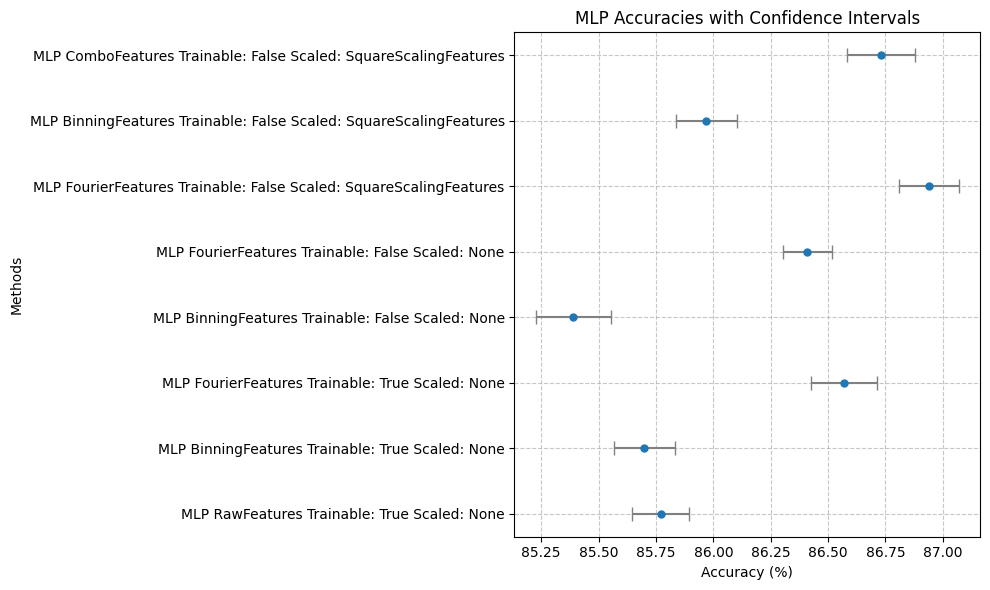

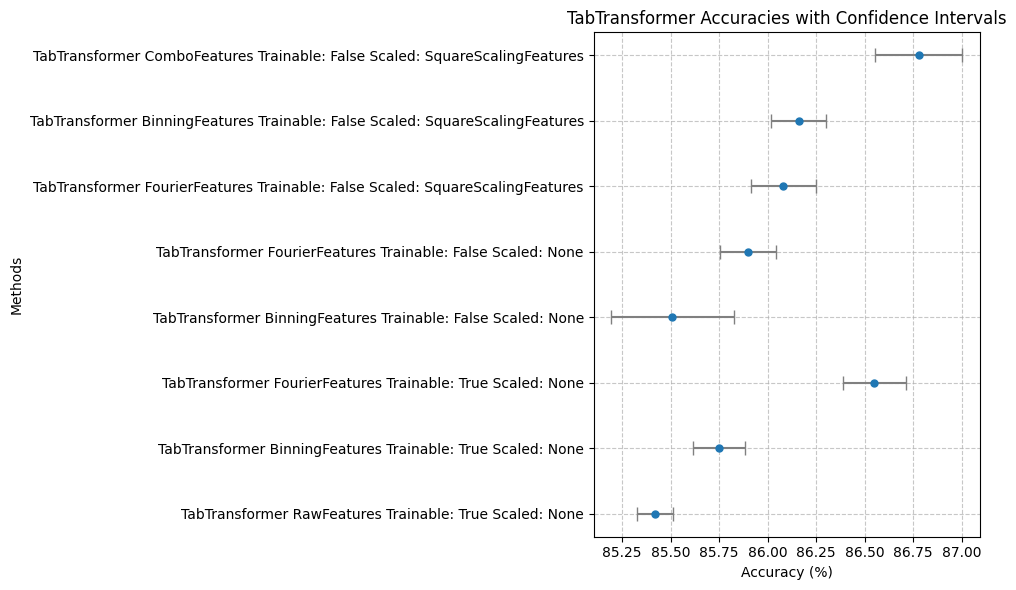

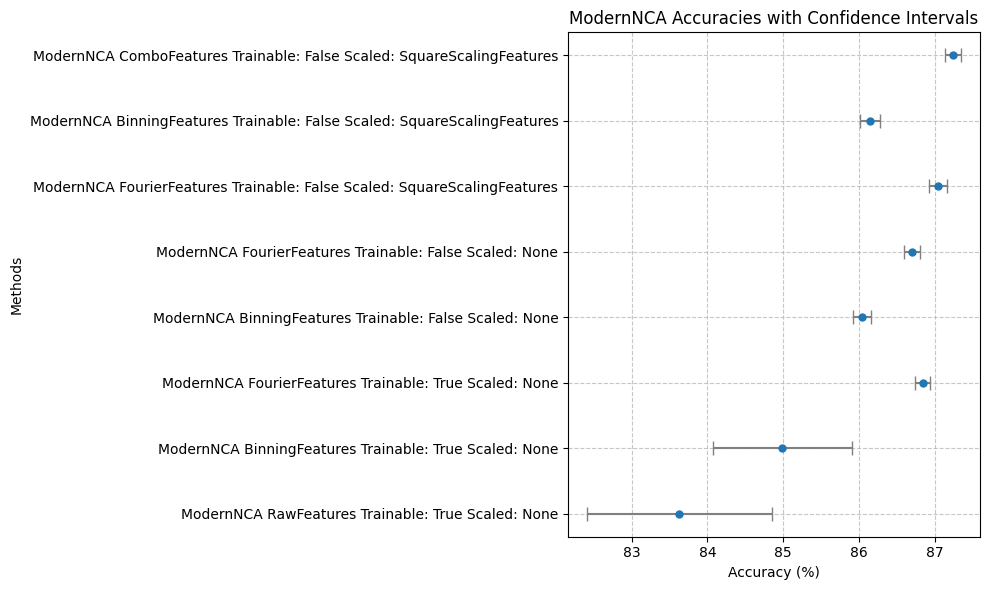

In [8]:
import math
import re
import ast
import pandas as pd
import os
import matplotlib.pyplot as plt
os.chdir('/home/mrsergazinov/TabLLM/feature_encoding_exp/')

# Initialize an empty list to store the results
results = []

# Replace 'your_file.txt' with the path to your text file
with open('results.txt', 'r') as f:
    lines = f.readlines()

# Variables to hold current parameters
current_params = None

# Loop through the lines
for line in lines:
    line = line.strip()
    if line.startswith('Parameters:'):
        # Extract the parameters
        params_str = line[len('Parameters: '):]
        # Safely evaluate the string to a dictionary
        params = ast.literal_eval(params_str)
        current_params = params
    elif line.startswith('Overall Average Accuracy over'):
        # Extract the mean and standard deviation
        match = re.search(r'Overall Average Accuracy over \d+ runs: ([\d\.]+)% ± ([\d\.]+)%', line)
        if match and current_params is not None:
            mean_accuracy = float(match.group(1))
            std_accuracy = float(match.group(2))
            # Combine parameters and accuracies into a single dictionary
            result = {
                'model_name': current_params.get('model_name'),
                'num_encoder': current_params.get('num_encoder'),
                'num_encoder_trainable': current_params.get('num_encoder_trainable'),
                'num_encoder_scale': current_params.get('scaler'),
                'Average Accuracy (%)': mean_accuracy,
                'Std Dev (%)': std_accuracy / math.sqrt(10),
            }
            results.append(result)
            current_params = None  # Reset for the next block

# Create a DataFrame from the results
df = pd.DataFrame(results)

df['num_encoder'] = df['num_encoder'].fillna('RawFeatures')
df['num_encoder_trainable'] = df['num_encoder_trainable'].astype(str)
df['num_encoder_scale'] = df['num_encoder_scale'].astype(str)
df['Method'] = (df['model_name'] + ' ' + 
                df['num_encoder'] + ' ' + 
                'Trainable: ' + df['num_encoder_trainable'] + ' ' +
                'Scaled: ' + df['num_encoder_scale']).astype(str)

for model in df['model_name'].unique():
    df_model = df[df['model_name'] == model]
    plt.figure(figsize=(10, 6))
    plt.errorbar(
        df_model['Average Accuracy (%)'],
        df_model['Method'],
        xerr=df_model['Std Dev (%)'],
        fmt='o',
        ecolor='gray',
        capsize=5,
        markersize=5,
        linestyle='None'
    )
    plt.xlabel('Accuracy (%)')
    plt.ylabel('Methods')
    plt.title(f'{model} Accuracies with Confidence Intervals')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [6]:
# sort by num_encoder
df = df.sort_values('num_encoder')
df

,model_name,num_encoder,num_encoder_trainable,num_encoder_scale,Average Accuracy (%),Std Dev (%),Method
11,ModernNCA,BinningFeatures,True,None,84.99,0.913898,ModernNCA BinningFeatures Trainable: True Scal...
19,TabTransformer,BinningFeatures,False,SquareScalingFeatures,86.16,0.142302,TabTransformer BinningFeatures Trainable: Fals...
16,MLP,BinningFeatures,False,SquareScalingFeatures,85.97,0.132816,MLP BinningFeatures Trainable: False Scaled: S...
13,ModernNCA,BinningFeatures,False,None,86.04,0.123329,ModernNCA BinningFeatures Trainable: False Sca...
8,TabTransformer,BinningFeatures,False,None,85.51,0.316228,TabTransformer BinningFeatures Trainable: Fals...
6,TabTransformer,BinningFeatures,True,None,85.75,0.135978,TabTransformer BinningFeatures Trainable: True...
22,ModernNCA,BinningFeatures,False,SquareScalingFeatures,86.14,0.132816,ModernNCA BinningFeatures Trainable: False Sca...
3,MLP,BinningFeatures,False,None,85.39,0.164438,MLP BinningFeatures Trainable: False Scaled: None
1,MLP,BinningFeatures,True,None,85.70,0.132816,MLP BinningFeatures Trainable: True Scaled: None
21,TabTransformer,ComboFeatures,False,SquareScalingFeatures,86.78,0.224522,TabTransformer ComboFeatures Trainable: False ...
